## Comparison of different linear SVM classifier on a 2D projection of Iris dataset
> we only consider first two features of this dataset
> * Sepal length
> * Sepal width

### This notebook show how to plot the decision surface for four SVM classifier with different kernels

The linear models `LinearSVC` and `SVC(kernel='linear')` yield slightly different decision boundary , this can be the consquence of the following
> * `LinearSVC` minimizes the squared hinge loss while `SVC(kernel="linear")` minimizes regular hinge loss
> * `LinearSVC` uses One-vs-All (also known as One-vs-Rest) multiclass reduction while `SVC` uses One-vs-One multiclass reduction

Both linear models have linear decision boundary (intesecting hyperplanes)
while the non-linear kernel models (polynomial or Gaussian RBF) have a more flexible non-linear decision boundary with shapes that depend on the kind of kernel and its parameters.



### sklearn.multiclass.OneVsRestClassifier

>The strategy consists in fitting one classifier per class.

>its computational efficient

>advantage of this approach is its interpretability

One-vs-Rest OvR multiclass strategy
Also know as One-vs-All , this strategy consists in fitting one classifier per class. For each classifier, the class the is fitted against all other classes. In addition to its computational efficiency (only n_classes classifiers are needed), one advantage of this approach is its interpretability. Since each class is represented by one and one classifier only, it is possible to gain knowledge about the class by inspecting its corresponding classifier. This is the most commonly used strategy for multiclass classification and is a fair default choice.

### sklearn.multiclass.OneVsOneClassifier

>OneVsOneClassifier constructs one classifier per pair of classes.

>The class which received the most votes is selected at the prediction time

>This method is usually slower than one-vs-the-rest , O(n_classes^2) complexity

>This method may be advantageous for algorithms such as kernel algorithms which don’t scale well with n_samples.

OneVsOneClassifier constructs one classifier per pair of classes. At prediction time, the class which received the most votes is selected. In the event of a tie (among two classes with an equal number of votes), it selects the class with the highest aggregate classification confidence by summing over the pair-wise classification confidence levels computed by the underlying binary classifiers.

Since it requires to fit n_classes * (n_classes - 1) / 2 classifiers, this method is usually slower than one-vs-the-rest, due to its O(n_classes^2) complexity. However, this method may be advantageous for algorithms such as kernel algorithms which don’t scale well with n_samples. This is because each individual learning problem only involves a small subset of the data whereas, with one-vs-the-rest, the complete dataset is used n_classes times. The decision function is the result of a monotonic transformation of the one-versus-one classification.



In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [9]:
# Utilty functions 


# create a mesh of points to plot in
def make_meshgrid(x, y, h=0.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


# plot the decision boundary for the classifier
def plot_decision_boundary(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    return ax.contourf(xx, yy, Z, **params)
 
    

## import the iris dataset

In [19]:
# import the dataset
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data[:, :2]
y = iris.target

### we create instances of SVM and fit our data
### we don't scale the data because we want to plot the Support Vectors

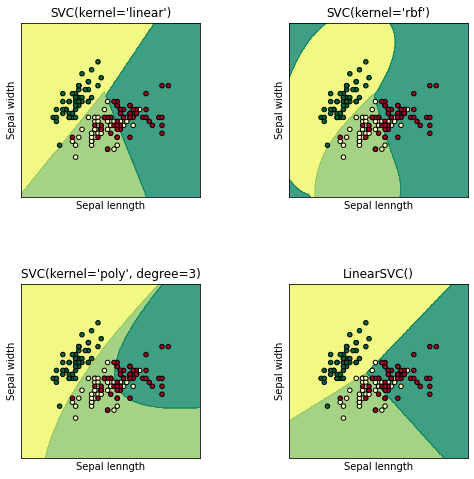

In [78]:
from sklearn import svm

# SVM regularization parameter
C=1.0

# models SVC(kernel='linear'), SVC(kernel='rbf'),SVC(kernel='poly'), LinearSVC()
models = (
    svm.SVC(kernel='linear', C=C, ),
    svm.SVC(kernel='rbf', C=C, gamma=0.7),
    svm.SVC(kernel='poly', C=C, degree=3, gamma='auto'),
    svm.LinearSVC(C=C, max_iter=10000)
    
)

# train the model on training data
models = (model.fit(X,y) for model in models)

# set the titles for the model
titles = ( "SVC(kernel='linear')" , "SVC(kernel='rbf')", "SVC(kernel='poly', degree=3)", "LinearSVC()")


# setup a 2*2 grid for plotting 
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(8,8))
plt.subplots_adjust(wspace=0.5,hspace=0.5)

X0, X1 = X[:,0], X[:,1]

XX, YY = make_meshgrid(X0,X1)

for model,title,ax in zip(models,titles,ax.flatten()):
    plot_decision_boundary(ax,model,XX,YY,cmap=plt.cm.summer_r, alpha=0.8)
    ax.scatter(X0, X1,c=y, cmap=plt.cm.RdYlGn_r, s=20, edgecolors='black')
    ax.set(title=title, xlabel='Sepal lenngth', ylabel='Sepal width')
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()